In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

D:\anaconda\envs\setareh\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Att ta mindre data för att påskynda träningen.
X_train = X[:5000]
y_train = y[:5000]
X_test = X[5000:6000]
y_test = y[5000:6000]

In [6]:
# Inspekterar våra data.
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


Skapa modell SVM

In [8]:
# Skapa en enkel modell med SVC och utvärdera den på testsetet
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, probability=True ,coef0=1, C=5))
    ])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=5, coef0=1, kernel='poly', probability=True))])

In [9]:
#evaluate dess prestanda på testsetet:
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.946

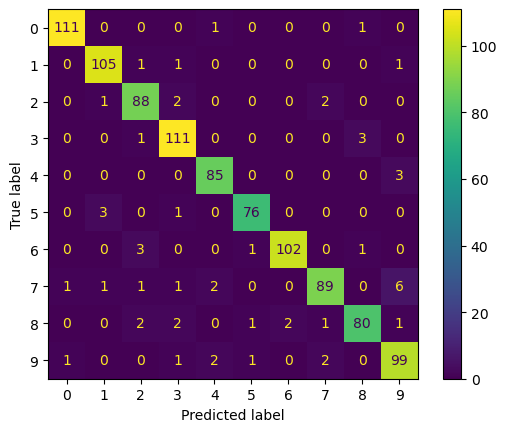

In [10]:
display_confusion_matrix(y_test, y_pred)

Jag vill hitta hyperparametrar för SVM med gridsearch nu

In [11]:
# Skapa en pipeline för SVM-modellen
svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC())
    ])


# Definiera hyperparameterrutnätet för att söka efter SVM
svm_param_grid = [
    {'svm_clf__kernel': ['linear', 'poly', 'rbf'],
     'svm_clf__C': [0.1, 1, 10, 100],
     'svm_clf__gamma': ['scale', 'auto']}
]

In [12]:
# Använda GridSearch för att hitta de bästa hyperparametrarna
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC())]),
             param_grid=[{'svm_clf__C': [0.1, 1, 10, 100],
                          'svm_clf__gamma': ['scale', 'auto'],
                          'svm_clf__kernel': ['linear', 'poly', 'rbf']}])

In [13]:
svm_grid_search.best_params_

{'svm_clf__C': 100, 'svm_clf__gamma': 'scale', 'svm_clf__kernel': 'poly'}